In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Make charts a bit bigger
plt.rcParams['figure.figsize'] = (8, 5)

# Load the CSV (Colab path)
df = pd.read_csv("/content/Ecommerce sales.csv")

# Show first few rows
df.head()

,OrderID,OrderDate,Region,Product,Category,Quantity,UnitPrice,CustomerType,PaymentMethod
0,1001,02-01-2023,South,Laptop Sleeve,Accessories,2.0,15.0,New,Credit Card
1,1002,03-01-2023,North,Bluetooth Speaker,Electronics,1.0,40.0,Returning,UPI
2,1003,03-01-2023,West,Office Chair,Furniture,1.0,120.0,New,Cash
3,1004,04-01-2023,East,Wireless Mouse,Electronics,3.0,12.0,Returning,Credit Card
4,1005,05-01-2023,South,Keyboard,Electronics,1.0,25.0,New,Debit Card


In [3]:
# Basic info: columns, data types, non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        56 non-null     int64  
 1   OrderDate      56 non-null     object 
 2   Region         56 non-null     object 
 3   Product        56 non-null     object 
 4   Category       56 non-null     object 
 5   Quantity       56 non-null     float64
 6   UnitPrice      56 non-null     float64
 7   CustomerType   56 non-null     object 
 8   PaymentMethod  56 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.1+ KB


In [4]:
# Summary statistics (for all columns)
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderID,56.0,NaN,NaN,NaN,1028.5,16.309506,1001.0,1014.75,1028.5,1042.25,1056.0
OrderDate,56,29,03-01-2023,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,56,4,South,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,56,56,Laptop Sleeve,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,56,6,Electronics,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,56.0,NaN,NaN,NaN,2.321429,2.081146,1.0,1.0,1.0,3.0,10.0
UnitPrice,56.0,NaN,NaN,NaN,19.678571,21.11902,0.5,5.75,13.0,25.75,120.0
CustomerType,56,2,New,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,56,4,Credit Card,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Make sure Quantity and UnitPrice are numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        56 non-null     int64         
 1   OrderDate      20 non-null     datetime64[ns]
 2   Region         56 non-null     object        
 3   Product        56 non-null     object        
 4   Category       56 non-null     object        
 5   Quantity       56 non-null     float64       
 6   UnitPrice      56 non-null     float64       
 7   CustomerType   56 non-null     object        
 8   PaymentMethod  56 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 4.1+ KB


In [6]:
# Remove rows where date/quantity/price is missing
df = df.dropna(subset=['OrderDate', 'Quantity', 'UnitPrice'])

# Remove rows with non-positive quantity or price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Quick check: any missing left?
df.isna().sum()


,0
OrderID,0
OrderDate,0
Region,0
Product,0
Category,0
Quantity,0
UnitPrice,0
CustomerType,0
PaymentMethod,0


In [7]:
# Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Month for grouping (e.g., "2023-01")
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)

df.head()


,OrderID,OrderDate,Region,Product,Category,Quantity,UnitPrice,CustomerType,PaymentMethod,Revenue,Month
0,1001,2023-02-01,South,Laptop Sleeve,Accessories,2.0,15.0,New,Credit Card,30.0,2023-02
1,1002,2023-03-01,North,Bluetooth Speaker,Electronics,1.0,40.0,Returning,UPI,40.0,2023-03
2,1003,2023-03-01,West,Office Chair,Furniture,1.0,120.0,New,Cash,120.0,2023-03
3,1004,2023-04-01,East,Wireless Mouse,Electronics,3.0,12.0,Returning,Credit Card,36.0,2023-04
4,1005,2023-05-01,South,Keyboard,Electronics,1.0,25.0,New,Debit Card,25.0,2023-05


In [8]:
rev_by_region = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
rev_by_region


,Revenue
Region,
West,275.0
North,160.0
South,158.0
East,125.0


In [9]:
rev_by_month = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)
rev_by_month


,Revenue
Month,
2023-03,160.0
2023-09,81.0
2023-08,70.0
2023-07,70.0
2023-06,65.0
2023-12,59.0
2023-05,57.0
2023-10,50.0
2023-11,40.0


In [10]:
qty_by_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
qty_by_category


,Quantity
Category,
Stationery,21.0
Accessories,13.0
Electronics,8.0
Home Decor,5.0
Bags,1.0
Furniture,1.0


In [11]:
rev_by_category = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
rev_by_category


,Revenue
Category,
Electronics,241.0
Accessories,172.0
Furniture,120.0
Home Decor,86.0
Stationery,54.0
Bags,45.0


In [12]:
rev_by_product = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
rev_by_product


,Revenue
Product,
Office Chair,120.0
Smartwatch,60.0
Bluetooth Earbuds,50.0
Backpack,45.0
Laptop Stand,40.0


In [13]:
total_rev_customer = df.groupby('CustomerType')['Revenue'].sum()
total_rev_customer


,Revenue
CustomerType,
New,433.0
Returning,285.0


In [14]:
payment_counts = df['PaymentMethod'].value_counts()
payment_counts


,count
PaymentMethod,
Credit Card,6
UPI,6
Cash,4
Debit Card,4


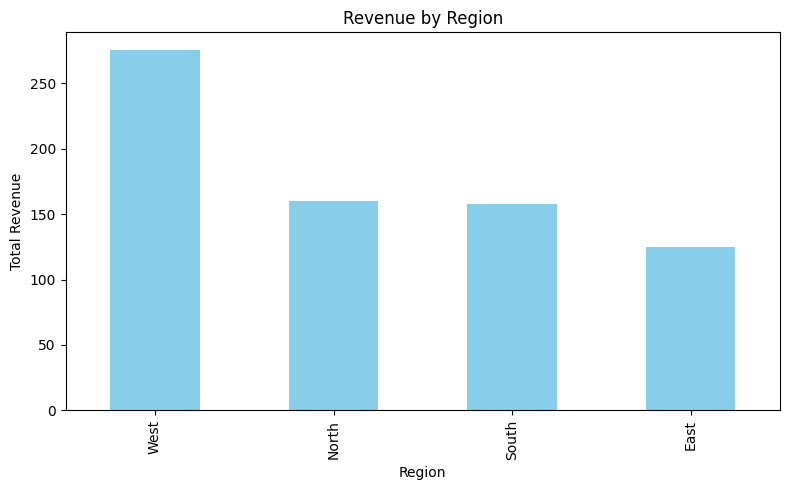

In [15]:
rev_by_region.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


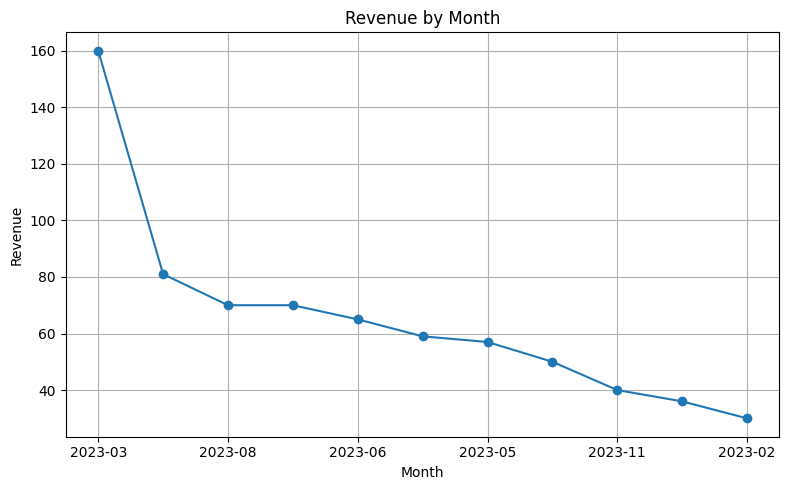

In [16]:
rev_by_month.plot(kind='line', marker='o')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


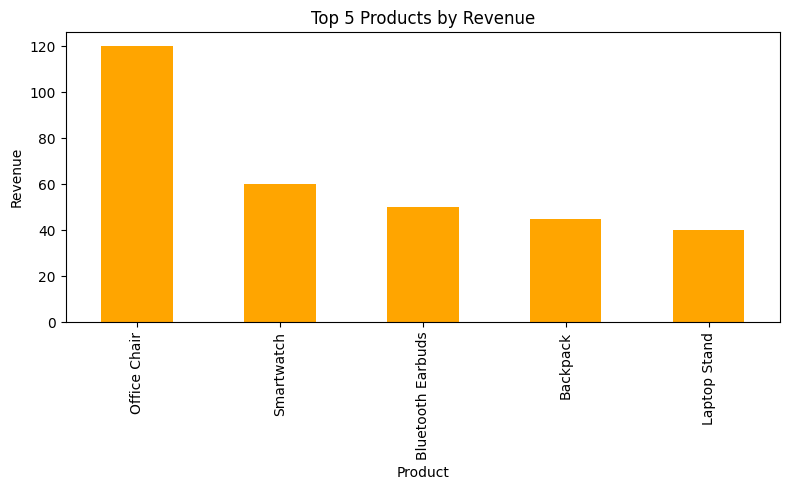

In [17]:
rev_by_product.plot(kind='bar', color='orange')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


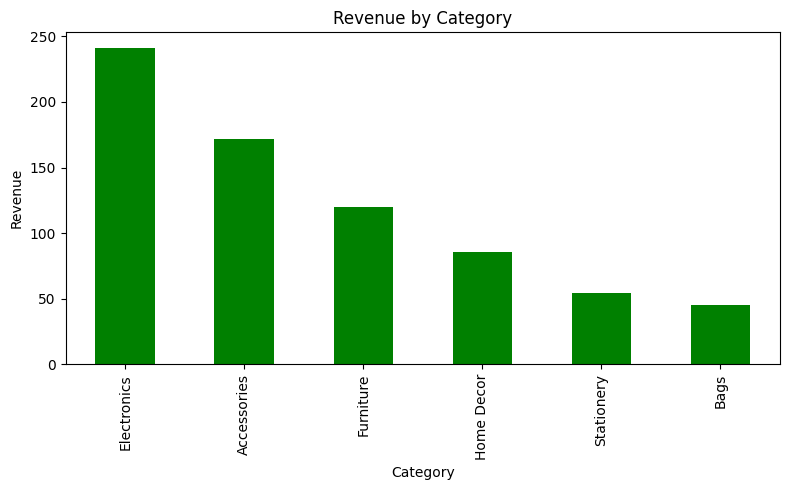

In [18]:
rev_by_category.plot(kind='bar', color='green')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
